<a href="https://colab.research.google.com/github/SourabhThanvi/ZeoTap-Data-Science-Assignment-/blob/main/Sourabh_Thanvi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. South America leads in the highest number of orders (789), showcasing strong demand.  
2. Asia drives the highest revenue despite lower quantities, indicating high-value product sales.  
3. Books are the most sold category, but Electronics generate the most revenue, reflecting higher pricing or profit margins.  
4. Regional category insights:
   - Asia: Clothing generates the most revenue.  
   - Europe: Books dominate revenue generation.  
   - North America: Electronics lead in revenue.  
   - South America: Books are the top revenue contributor.  
5. Top customers (e.g., C0141, C0054) significantly contribute to revenue, preferring Books and Clothing.  
6. Recommend high-revenue products or categories frequently purchased by top customers to boost sales.  
7. The price column shows no outliers, but prices are not normally distributed, suggesting varied pricing strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cos_df = pd.read_csv('/content/Customers.csv')
prod_df = pd.read_csv('/content/Products.csv')
trans_df = pd.read_csv('/content/Transactions.csv')

In [6]:
cos_df.sample(5)

,CustomerID,CustomerName,Region,SignupDate
94,C0095,William Walker,South America,2023-03-04
150,C0151,Amber Gonzalez,South America,2024-11-22
124,C0125,Nicholas Taylor,North America,2022-12-18
93,C0094,Emily Trevino,North America,2023-09-16
85,C0086,Stephanie Peterson,Europe,2022-09-18


In [4]:
prod_df.sample(5)

,ProductID,ProductName,Category,Price
53,P054,SoundWave Cookbook,Books,57.30
89,P090,ComfortLiving Biography,Books,165.30
4,P005,TechPro T-Shirt,Clothing,429.31
30,P031,SoundWave Headphones,Electronics,196.40
50,P051,ComfortLiving Desk Lamp,Home Decor,65.16


In [5]:
trans_df.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
143,T00581,C0083,P054,2024-11-13 04:56:27,2,114.60,57.30
441,T00895,C0121,P022,2024-05-03 18:35:03,3,412.62,137.54
305,T00614,C0042,P076,2024-04-28 14:38:55,1,429.29,429.29
795,T00534,C0004,P097,2024-06-25 22:10:47,3,958.02,319.34
302,T00149,C0093,P076,2024-07-13 13:50:21,4,1717.16,429.29


## Group_Data

In [10]:
merge_one = pd.merge(trans_df, prod_df, how = 'inner', on = ['ProductID', 'Price'])

In [11]:
df = pd.merge(merge_one, cos_df, how = 'inner', on = 'CustomerID')

In [12]:
df.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
852,T00949,C0169,P056,2024-02-16 14:52:24,4,64.32,16.08,SoundWave Smartwatch,Electronics,Jennifer Shaw,South America,2023-04-13
517,T00397,C0187,P009,2024-07-04 05:29:36,1,325.01,325.01,BookWorld Wall Art,Home Decor,Kayla Kelly,South America,2024-08-02
475,T00854,C0017,P059,2024-07-14 10:29:11,1,303.20,303.20,SoundWave Jeans,Clothing,Jennifer King,Europe,2023-12-05
683,T00108,C0177,P055,2024-11-04 03:30:07,1,128.53,128.53,BookWorld Biography,Books,Julia Kelly,Asia,2024-06-01
548,T00279,C0059,P096,2024-09-09 19:42:23,1,307.47,307.47,SoundWave Headphones,Electronics,Mrs. Kimberly Wright,North America,2024-04-07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   CustomerName     1000 non-null   object 
 10  Region           1000 non-null   object 
 11  SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [14]:
df.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0
ProductName,0
Category,0
CustomerName,0


In [15]:
df.duplicated().sum()

0

## Correcting DataType

In [18]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [19]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [59]:
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day

## Region

In [27]:
# South America has most numbers of orders
df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Region,
South America,789
Europe,595
North America,593
Asia,560


In [54]:
# Asia generated most of the revenue with least quantity ordered
round(df.groupby('Region')['TotalValue'].median(),2).sort_values(ascending=False)

,TotalValue
Region,
Asia,612.76
South America,611.32
Europe,596.58
North America,456.92


<Axes: xlabel='Region', ylabel='TotalValue'>

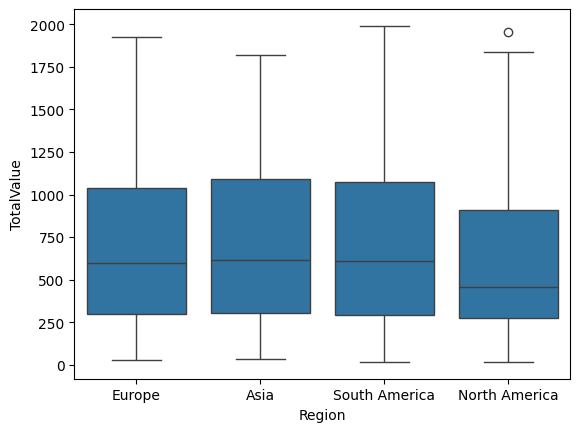

In [75]:
sns.boxplot(x=df['Region'], y=df['TotalValue'])

## Category

In [29]:
# total quantity sold per category.
# Books are most sold category
df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Category,
Books,681
Home Decor,639
Electronics,627
Clothing,590


In [55]:
# Electronic generated most of the revenue.
round(df.groupby('Category')['TotalValue'].median(),2).sort_values(ascending=False)

,TotalValue
Category,
Electronics,635.72
Clothing,606.70
Books,502.83
Home Decor,477.99


<Axes: xlabel='Category', ylabel='Price'>

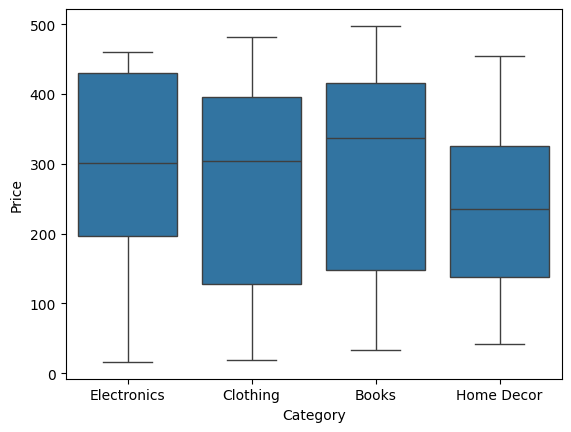

In [41]:
sns.boxplot(x=df['Category'], y=df['Price'])

## Product Name

In [64]:
round(df.groupby('ProductName')['Price'].median(),2).sort_values(ascending=False).head()

,Price
ProductName,
BookWorld Cookbook,488.63
SoundWave T-Shirt,481.78
ComfortLiving Smartphone,456.28
HomeSense Running Shoes,452.42
HomeSense Cookware Set,447.34


In [35]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


In [78]:
# Which region ordered most of the category.
# In asia cloths category generates most of the revenue
# in europe books generated most of the revenue
# in north america electronic generates most of the revenue
# in south america books generates most of the revenue

pd.crosstab(df['Region'], df['Category'], values=df['TotalValue'], aggfunc='sum', margins=True)

Category,Books,Clothing,Electronics,Home Decor,All
Region,,,,,
Asia,33119.03,49353.09,35658.15,33944.70,152074.97
Europe,47464.42,36335.59,41562.60,40892.02,166254.63
North America,41811.99,38038.49,44716.43,27746.49,152313.40
South America,69752.03,42443.49,58846.32,48310.72,219352.56
All,192147.47,166170.66,180783.50,150893.93,689995.56


## Numerical Analysis

In [53]:
df[['Quantity', 'TotalValue', 'Price']].describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


<Axes: xlabel='Price', ylabel='Count'>

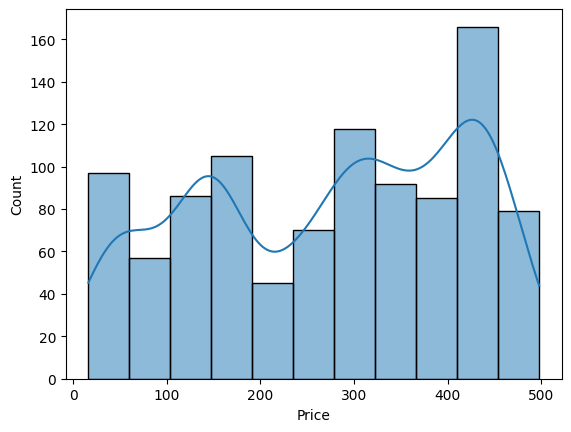

In [51]:
# No outlier and not having a normal distribution in price column
sns.histplot(df['Price'], kde=True, fill=True)

<Axes: ylabel='Price'>

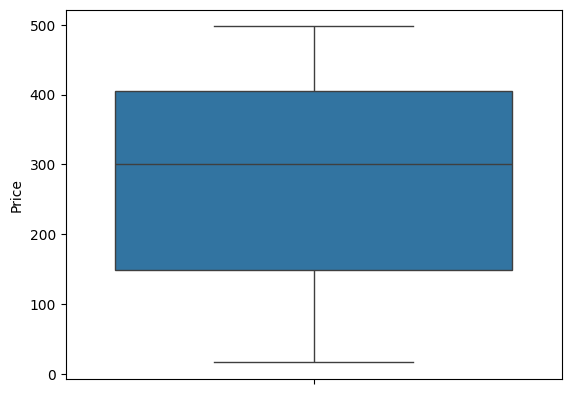

In [50]:
sns.boxplot(df['Price'])

##

<Axes: xlabel='TransactionMonth'>

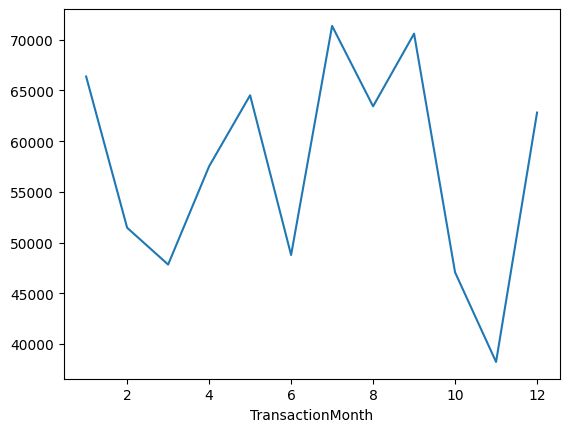

In [60]:
df.groupby('TransactionMonth')['TotalValue'].sum().plot(kind='line')

## Customer_ID

In [66]:
# Top Customers

df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91
C0188,7111.32
C0059,7073.28
C0028,6819.57
C0099,6715.72


In [67]:
customer_analysis = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()

In [69]:
new_df = df[df['CustomerID'].isin(customer_analysis['CustomerID'])]

In [80]:
# We can recomend products or categories which has been purchased by our top customers.
new_df.groupby(['Category', 'CustomerID'])['TotalValue'].sum()

Category     CustomerID
Books        C0028         2371.53
             C0054         1213.20
             C0059          447.23
             C0065         3743.70
             C0082         4309.99
             C0099         2914.60
             C0141         3162.24
             C0156         1918.14
             C0165         3780.92
             C0188         2989.92
Clothing     C0028         1517.50
             C0054         2802.60
             C0059         1541.48
             C0082         1806.76
             C0099         3736.80
             C0141         4037.15
             C0156         2874.27
             C0165         1626.26
             C0188         2449.30
Electronics  C0028         2223.80
             C0054         2173.42
             C0059         1687.05
             C0065         1734.56
             C0082          867.28
             C0099           64.32
             C0141         2884.92
             C0156         2842.04
             C0165         1300.92
             C0188         1259.48
Home Decor   C0028          706.74
             C0054         1851.17
             C0059         3397.52
             C0065         2185.44
             C0082          588.88
             C0141          589.56
             C0188          412.62
Name: TotalValue, dtype: float64